# SciPy
-------------------------------------------------------------------

Kushal Keshavamurthy Raviprakash

kushalkr2992@gmail.com

This notebook is a part of the [Python for Earth and Atmospheric Sciences](https://github.com/Kushalkr/Python_for_Earth_and_Atmospheric_Sciences) workshop.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

## Introduction
-------------------------------------------------------------------

**SciPy** is an acronym for **Sci**entific **Py**thon. <img src="images/scipy.png" style="float: right" />

According to the official website of [SciPy](https://www.scipy.org):
> SciPy is a Python-based ecosystem of open-source software for mathematics, science, and engineering.

But, there is also a library called `scipy` which is a package that forms one of the core packages of the SciPy ecosystem called SciPy stack.

The `scipy` library provides user-friendly and efficient numerical algorithms in python such as numerical integration and interpolation.

The `scipy` packages has several submodules with various functions. These functions are classified as follows:
* [Basic functions](https://docs.scipy.org/doc/scipy/reference/tutorial/basic.html)
* [Special functions](https://docs.scipy.org/doc/scipy/reference/tutorial/special.html) ( `scipy.special` )
* [Integration](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html) ( `scipy.integrate` )
* [Optimization](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html) ( `scipy.optimize` )
* [Interpolation](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html) ( `scipy.interpolate` )
* [Fourier Transforms](https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html) ( `scipy.fftpack` )
* [Signal Processing](https://docs.scipy.org/doc/scipy/reference/tutorial/signal.html) ( `scipy.signal` )
* [Linear Algebra](https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html) ( `scipy.linalg` )
* [Sparse Eigenvalue Problems with ARPACK](https://docs.scipy.org/doc/scipy/reference/tutorial/arpack.html)
* [Compressed Sparse Graph Routines](https://docs.scipy.org/doc/scipy/reference/tutorial/csgraph.html) ( `scipy.sparse.csgraph` )
* [Spatial data structures and algorithms](https://docs.scipy.org/doc/scipy/reference/tutorial/spatial.html) ( `scipy.spatial` )
* [Statistics](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html) ( `scipy.stats` )
* [Multidimensional image processing](https://docs.scipy.org/doc/scipy/reference/tutorial/ndimage.html) ( `scipy.ndimage` )
* [File IO](https://docs.scipy.org/doc/scipy/reference/tutorial/io.html) ( `scipy.io` )

As it stands, I will only be discussing the `scipy.interpolate`, `scipy.linalg` and `scipy.io` followed by I/O of common data formats used in the Earth and Atmospheric sciences.

we can import scipy in our programs as:
```py
import scipy
```
or

```py
import scipy as sp
```
I will stick to the former.

In [2]:
import scipy.linalg as la

## Linear Albegra
-------------------------------------------------------------------

We discussed some linear algebra with `numpy.linalg`. Alternatively, there is a sub-module called `linalg` within `scipy` too. So, now we have both `numpy.linalg` and `scipy.linalg`. Which one is better? The answer is `scipy.linalg`. The reason is that some matrix operations such as inverse require that we convert our `numpy.ndarray` to a `numpy.matrix` class whereas, the `scipy.linalg` sub-module provides functions which can be applied to `numpy.ndarray` just the same.

Let's try some examples.

In [3]:
import numpy as np

A = np.random.randn(5,5)
A

array([[-0.80087526,  1.26501949, -0.01119057,  1.11011117, -0.86194311],
       [ 0.85040203, -2.12095065,  0.94722993, -2.53934208,  0.67796675],
       [ 0.44206591,  0.90753084,  0.81316294, -0.58170523, -2.53262216],
       [-0.62223381, -0.20053917, -0.99416635, -0.12632986,  0.51241882],
       [-1.26746284, -0.23129227,  0.63403143,  0.73116943, -2.16261022]])

In [4]:
la.inv(A)

array([[-1.34818526, -0.64603821,  0.25612877, -0.43425429, -0.06803394],
       [ 1.14490775,  0.31888436,  0.14238272,  0.08693233, -0.50249842],
       [ 1.08207787,  0.57772912, -0.33708726, -0.76699508, -0.03713868],
       [-0.81470086, -0.57576059, -0.25218109, -0.54819485,  0.30965049],
       [ 0.70949143,  0.31924098, -0.34942808, -0.16499872, -0.27498512]])

Let's solve the equation:

$$
\begin{align*}
2x +y + 3z &= 15 \\
-3y + z &= 7 \\
x + z &= 6
\end{align*}
$$
This is of the form $Ax=b$. Where, 
$$A = \left [ \begin{array}{ccc}
2 & 1 & 3 \\
0 & -3 & 1 \\
1 & 0 & 1 \end{array}\right ]
,~
b = \left [ \begin{array}{c}
15 \\
7 \\
6 \end{array}\right ]
\text{and} ~x = \left [ \begin{array}{c}
x \\
y \\
z \end{array}\right ]
$$

We can solve this using the inverse method:
$$
x = 
\left [ \begin{array}{c}
x \\
y \\
z \end{array}\right ]
 = \left [ \begin{array}{ccc}
2 & 1 & 3 \\
0 & -3 & 1 \\
1 & 0 & 1 \end{array}\right ]^{-1}\cdot ~\left [ \begin{array}{c}
15 \\
7 \\
6 \end{array}\right ]
$$


In [5]:
A = np.array([ [2, 1, 3], [0, -3, 1], [1, 0, 1] ])
b = np.array([ [15], [7], [6] ])
b

array([[15],
       [ 7],
       [ 6]])

In [6]:
la.inv(A).dot(b)

array([[ 2.],
       [-1.],
       [ 4.]])

This can also be solved as below

In [7]:
la.solve(A,b) # This method is faster

array([[ 2.],
       [-1.],
       [ 4.]])

You can also find the determinant of an array as shown below.

In [8]:
la.det(A)

4.0

You can get the norm as well.

In [9]:
la.norm(A)

5.0990195135927845

The eigenvalues and eigenvectors can be calculated as shown.

In [10]:
evals, evecs = la.eig(A) #eigenvalues are stored in evals and eigenvectors are stored in evecs
print(evals, '\n\n', evecs)

[ 3.34596330+0.j -0.40672843+0.j -2.93923487+0.j] 

 [[ 0.9181606   0.79543716  0.23238644]
 [ 0.06167368 -0.21804574 -0.97083284]
 [ 0.39137893 -0.56545183 -0.05899279]]


## Interpolation
-------------------------------------------------------------------

### 1-Dimensional Interpolation

We will use the **`interp1d`** class of the **`scipy.interpolate`** sub-module which generates a interpolation function based on the known values.

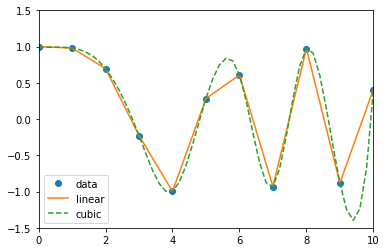

In [11]:
import scipy.interpolate as interp

x = np.linspace(0, 10, 11) # The initial coarse data 
y = np.cos(x**2/5.) # The function using the coarse data

f = interp.interp1d(x, y) # 1-D interpolation function using piecewise linear interpolation.
f2 = interp.interp1d(x, y, kind='cubic') # 1-D interpolation function using piecewise cubic interpolation.

xnew = np.linspace(0,10, 51) # Finer input data.

y1 = f(xnew) # Curve with linearly interpolated values
y2 = f2(xnew) # interpolated values of the function using piecewise cubic interpolation

#Let's see what out interpolation functions have done for us.
# You may not understand the follwing lines of code yet, but bear with me.

plt.plot(x, y, 'o', xnew, y1, '-', xnew, y2, '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.xlim(0, 10)
plt.ylim(-1.5,1.5)
plt.show()

You are not required to understand the plotting code at the moment. But just run it to see what the interpolation has yielded.

### Multivariate Interpolation

What if we have data that is not one dimensional but something such as an image or gridded data in the fields of Earth and Atmospheric Sciences which have latitudes longitudes and depth or vertical levels? How do we interpolate in such a case?

Scipy has a function for this, called **`griddata`**. **`griddata`** performs the interpolation and return the interpolated data as a grid.

Let us see an example of how it is done.

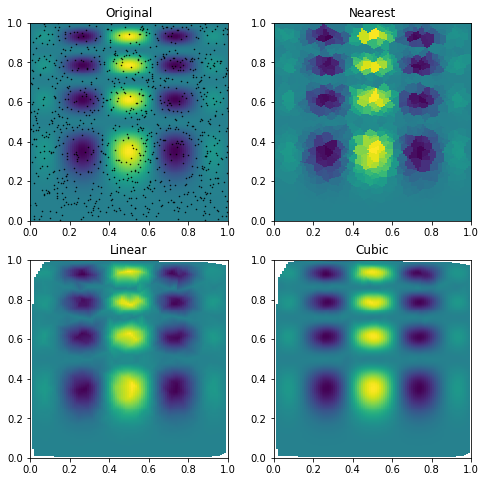

In [12]:
# define a function to generate values
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j] # create a grid in [0,1]x[0,1]
points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])

grid_z0 = interp.griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = interp.griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = interp.griddata(points, values, (grid_x, grid_y), method='cubic')

# Visualization of our interpolation
plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')
plt.gcf().set_size_inches(8, 8)
plt.show()

There are many other interpolation methods within the **`scipy.interpolate`** sub-module. 

Please refer to the [Further Reading](#Further Reading) section for more details.

## I/O of common data formats in the Earth and Atmospheric Sciences
-------------------------------------------------------------------


### Text files (.txt)

We have seen earlier in the I/O section of the python basics. But let's do an example with actual data.

I will be using the Mauna Loa Carbon dioxide data. It is found in the **`data/`** directory of my repository with the file name **`co2_annmean_mlo.txt`**.

It is an annual mean of the CO<sub>2</sub> data for the years **1959 - 2016**.

Let us read in that data into a variable.

In [13]:
# Regular method
f = open('data/co2_annmean_mlo.txt','r')
data = []
for line in f.readlines()[57:]:
    data.append(line.split())
data = np.array(data)
f.close()
print(data)
print('\n\n\n')


#Alternate (better) method
with open('data/co2_annmean_mlo.txt','r') as f:
    data = np.array([line.split() for line in f.readlines()[57:]])
print(data)

[['1959' '315.97' '0.12']
 ['1960' '316.91' '0.12']
 ['1961' '317.64' '0.12']
 ['1962' '318.45' '0.12']
 ['1963' '318.99' '0.12']
 ['1964' '319.62' '0.12']
 ['1965' '320.04' '0.12']
 ['1966' '321.38' '0.12']
 ['1967' '322.16' '0.12']
 ['1968' '323.04' '0.12']
 ['1969' '324.62' '0.12']
 ['1970' '325.68' '0.12']
 ['1971' '326.32' '0.12']
 ['1972' '327.45' '0.12']
 ['1973' '329.68' '0.12']
 ['1974' '330.18' '0.12']
 ['1975' '331.11' '0.12']
 ['1976' '332.04' '0.12']
 ['1977' '333.83' '0.12']
 ['1978' '335.40' '0.12']
 ['1979' '336.84' '0.12']
 ['1980' '338.75' '0.12']
 ['1981' '340.11' '0.12']
 ['1982' '341.45' '0.12']
 ['1983' '343.05' '0.12']
 ['1984' '344.65' '0.12']
 ['1985' '346.12' '0.12']
 ['1986' '347.42' '0.12']
 ['1987' '349.19' '0.12']
 ['1988' '351.57' '0.12']
 ['1989' '353.12' '0.12']
 ['1990' '354.39' '0.12']
 ['1991' '355.61' '0.12']
 ['1992' '356.45' '0.12']
 ['1993' '357.10' '0.12']
 ['1994' '358.83' '0.12']
 ['1995' '360.82' '0.12']
 ['1996' '362.61' '0.12']
 ['1997' '36

### Comma Separated Values (.csv)

To demonstrate I/O of csv files, I will use weather data for the year 2013, collected at Bloomington, IN (Courtesy of [Dr. Cody Kirkpatrick](http://geology.indiana.edu/kirkpatrick/)). The file can be located in the **`data/`** directory bearing the file name **`KBMG-2013.csv`**.

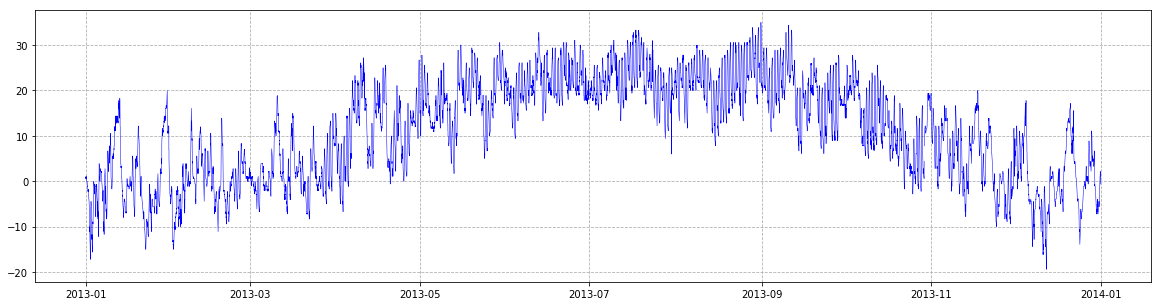

In [14]:
# Using NumPy
import numpy as np
from datetime import datetime # For pretty plotting

# Read the Data
data = np.genfromtxt('data/KBMG-2013.csv', delimiter=',', names=True, dtype=None)

# Initializing 
year=[]
day = []
month = []
hour = []
T = []

# Populating the lists with data

for i in range(len(data)):
    year.append(data[i][0]) # First column of every row holds the year
    month.append(data[i][1]) # Second column of every row holds the year
    day.append(data[i][2]) # Third column of every row holds the year
    hour.append(data[i][3]) # Forth column of every row holds the year
    T.append(data[i][20]) # Twenty-first column of every row holds the temperature data
    
T = np.array(T, dtype = np.float64) # converting to an array

# These two lines help with the plotting
date = list(zip(year, month, day, hour)) 
newdate = [datetime(*i) for i in date]

# Visualization

plt.figure(figsize=(20,5))
ax = plt.subplot()
ax.plot(newdate, T, 'b-', linewidth=0.5)
#ax.set_xlim(0,11625)
ax.grid(linestyle='--')
plt.show()

### NetCDF Files (.nc)

**NetCDF** is short for Network Common Data format. In Earth and Atmospheric Sciences, this is one of the most common file formats. NetCDF files are what are called self describing file due to the fact that they don't just contain data but also some _metadata_ about the data.

Let us try reading from a netCDF file and view the contents of a netCDF file.

Pure python does not support I/O of the NetCDF file format. So, We will see a couple of modules which will help us open, view and retrieve contents of a NetCDF file.

#### 1. Using the `netcdf` submodule of  `scipy.io`

In [15]:
from scipy.io import netcdf

f = netcdf.netcdf_file('data/ECMWF_ERA-40_subset.nc','r')
print(f.variables.keys())
time = f.variables['time'][:].copy()
lat = f.variables['latitude'][:].copy()
lon = f.variables['longitude'][:].copy()
tcw = f.variables['tcw'][:].copy()
f.close()

odict_keys(['longitude', 'latitude', 'time', 'tcw', 'tcwv', 'lsp', 'cp', 'msl', 'blh', 'tcc', 'p10u', 'p10v', 'p2t', 'p2d', 'e', 'lcc', 'mcc', 'hcc', 'tco3', 'tp'])


#### 2. Using the `netcdf4-python` module

To open a NetCDF file with the netcdf4-python module, we use the **`Dataset`** function as shown:

In [17]:
from netCDF4 import Dataset

f = Dataset('data/ECMWF_ERA-40_subset.nc','r')
print(f.dimensions.keys())
print(f.variables.keys())
print(f.variables['tcw'])

odict_keys(['longitude', 'latitude', 'time'])
odict_keys(['longitude', 'latitude', 'time', 'tcw', 'tcwv', 'lsp', 'cp', 'msl', 'blh', 'tcc', 'p10u', 'p10v', 'p2t', 'p2d', 'e', 'lcc', 'mcc', 'hcc', 'tco3', 'tp'])
<class 'netCDF4._netCDF4.Variable'>
int16 tcw(time, latitude, longitude)
    scale_factor: 0.00135009817455
    add_offset: 44.3250482745
    _FillValue: -32767
    missing_value: -32767
    units: kg m**-2
    long_name: Total column water
unlimited dimensions: time
current shape = (62, 73, 144)
filling off



## Further Reading

We'll take a look at plotting with matplotlib next.